In [1]:
import os
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sample_id_colors = sns.color_palette("hls", 8)

In [3]:
path = "/Volumes/sep22/home/wet_lab/_Experiments/007_COPD_CO_IMC/analysis/Imaris_analysis/epithelium"

In [4]:
# List all files in the folder
files_count = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Print the number of files
print(f"Number of files in the folder: {len(files_count)}")

Number of files in the folder: 30


In [5]:
# Empty list
file_list = []

# Dictionary to store DataFrames
dataframes_expression = {}
dataframes_cells = {}

In [6]:
# Loop through the files in the specified path
for file in os.listdir(path):
    file_list.append(file)

    # Construct full file path
    file_path = os.path.join(path, file)

    # Read CSV or Excel based on file type
    if file.endswith(".csv"):
        df = pd.read_csv(file_path)
    elif file.endswith((".xls", ".xlsx")):
        df = pd.read_excel(file_path)
    else:
        print(f"Skipping: {file} (Unsupported format)")
        continue  # Skip unsupported files

    # Set the first row as the header
    df.columns = df.iloc[0]
    df = df[1:]

    # Set the first column as the index
    df.set_index(df.columns[0], inplace=True)

    # Store DataFrame in dictionary using file name (without extension)
    df_name = os.path.splitext(file)[0]
    df_name = df_name.upper()  # make uppercase to match images name

    if df_name.endswith("_CELLS"):
        df_name = df_name.rsplit('_', 1)[0]
        dataframes_cells[df_name] = df
    elif df_name.endswith("_EXPRESSION"):
        df_name = df_name.rsplit('_', 1)[0]
        dataframes_expression[df_name] = df
    else:
        print(f"{df_name}: Neither cells nor expression information")
        
# Print DataFrame names and their counts
print("Loaded Cells DataFrames:", list(dataframes_cells.keys()))
print("Number of Cells DataFrames:", len(dataframes_cells))
print("Loaded Expression DataFrames:", list(dataframes_expression.keys()))
print("Number of Expression DataFrames:", len(dataframes_expression))
print("Done")


Loaded Cells DataFrames: ['D5_D6_D7_D8_002', 'D9_D10_001', 'D5_D6_D7_D8_003', 'D1_D2_D3_D4_001', 'D1_D2_D3_D4_002', 'D4_2_D2_2_D10_2_004', 'D4_2_D2_2_D10_2_002', 'D6_2_D7_2_001', 'D1_D2_D3_D4_004', 'D1_2_D8_2_001', 'D1_2_D8_2_002', 'D4_2_D2_2_D10_2_003', 'EPITHELIUM_ROI_EXAMPLE', 'D6_2_D7_2_002', 'D5_D6_D7_D8_001']
Number of Cells DataFrames: 15
Loaded Expression DataFrames: ['D1_D2_D3_D4_004', 'D1_D2_D3_D4_002', 'D9_D10_001', 'D1_2_D8_2_002', 'D4_2_D2_2_D10_2_003', 'D1_D2_D3_D4_001', 'D5_D6_D7_D8_003', 'D5_D6_D7_D8_002', 'D6_2_D7_2_002', 'EPITHELIUM_ROI_EXAMPLE', 'D4_2_D2_2_D10_2_002', 'D4_2_D2_2_D10_2_004', 'D6_2_D7_2_001', 'D5_D6_D7_D8_001', 'D1_2_D8_2_001']
Number of Expression DataFrames: 15
Done


In [7]:
# import names
images = pd.read_csv("/Users/sarapatti/Desktop/PhD_projects/Llyod_lab/COPD_CO_IMC/data/images.csv")
images["imc_name"] = images["image"].apply(lambda x: os.path.splitext(x)[0])
images.index = images["imc_name"] 
images_dict = dict(zip(images.index, images["acquisition_description"]))

In [8]:
# import metadata
meta = pd.read_excel("/Users/sarapatti/Desktop/PhD_projects/Llyod_lab/COPD_CO_IMC/data/meta_data/meta.xlsx", index_col=0)
meta

,slide_ID,acquisition_description,patient_ID,ID,block_ID,treatment,age,gender,race,ethnicity,...,RV/TLC,Cardiac,Musculoskeletal,Gastrointestinal,Genitourinary,Psychological,Neurological,Endocrine,ENT,Vascular
image_ID,,,,,,,,,,,,,,,,,,,,,
D1_D2_D3_D4_004,D1,D1,R03,47003,20H00999,pre_treatment,62.0,Male,Caucasian,Not_Hispanic,...,0.54664,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_2_D8_2_002,D1_6,D1_6,R03,47003,21H00314,6_months_post,62.0,Male,Caucasian,Not_Hispanic,...,0.54664,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D9_D10_001,D10,D10,R032,47032,21H00362,pre_treatment,73.0,Male,Caucasian,Not_Hispanic,...,1.12000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D4_2_D2_2_D10_2_004,D10_6,D10_6,R032,47032,21H01873,6_months_post,73.0,Male,Caucasian,Not_Hispanic,...,1.12000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_D2_D3_D4_002,D2,D2,R06,47006,20H01081,pre_treatment,74.0,Female,Caucasian,Not_Hispanic,...,0.49353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
D4_2_D2_2_D10_2_003,D2_6,D2_6,R06,47006,21H00423,6_months_post,74.0,Female,Caucasian,Not_Hispanic,...,0.49353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
D1_D2_D3_D4_001,D4,D4,R014,47014,20H01390,pre_treatment,59.0,Male,Asian,Not_Hispanic,...,0.40526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D4_2_D2_2_D10_2_002,D4_6,D4_6,R014,47014,21H00764,6_months_post,59.0,Male,Asian,Not_Hispanic,...,0.40526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D5_D6_D7_D8_003,D6,D6,R035,47035,21H00624,pre_treatment,61.0,Female,Caucasian,Not_Hispanic,...,0.43000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# Rename keys in dataframes_cells with values from images_dict
renamed_dataframes_cells = {}
for key, df in dataframes_cells.items():
    if key in images_dict:
        new_key = images_dict[key]
        renamed_dataframes_cells[new_key] = df
        print(key, new_key)
    else:
        print(f"Key {key} not found in images_dict, keeping original key.")
        renamed_dataframes_cells[key] = df

# Replace the original dataframes_cells with the renamed one
dataframes_cells = renamed_dataframes_cells

D5_D6_D7_D8_002 D7
D9_D10_001 D10
D5_D6_D7_D8_003 D6
D1_D2_D3_D4_001 D4
D1_D2_D3_D4_002 D2
D4_2_D2_2_D10_2_004 D10_6
D4_2_D2_2_D10_2_002 D4_6
D6_2_D7_2_001 D7
D1_D2_D3_D4_004 D1
D1_2_D8_2_001 D8_6
D1_2_D8_2_002 D1_6
D4_2_D2_2_D10_2_003 D2_6
Key EPITHELIUM_ROI_EXAMPLE not found in images_dict, keeping original key.
D6_2_D7_2_002 D6
D5_D6_D7_D8_001 D8


In [10]:
# Rename keys in dataframes_cells with values from images_dict
renamed_dataframes_expression = {}
for key, df in dataframes_expression.items():
    if key in images_dict:
        new_key = images_dict[key]
        renamed_dataframes_expression[new_key] = df
        print(key, new_key)
    else:
        print(f"Key {key} not found in images_dict, keeping original key.")
        renamed_dataframes_expression[key] = df

# Replace the original dataframes_cells with the renamed one
dataframes_expression = renamed_dataframes_expression
dataframes_expression

D1_D2_D3_D4_004 D1
D1_D2_D3_D4_002 D2
D9_D10_001 D10
D1_2_D8_2_002 D1_6
D4_2_D2_2_D10_2_003 D2_6
D1_D2_D3_D4_001 D4
D5_D6_D7_D8_003 D6
D5_D6_D7_D8_002 D7
D6_2_D7_2_002 D6
Key EPITHELIUM_ROI_EXAMPLE not found in images_dict, keeping original key.
D4_2_D2_2_D10_2_002 D4_6
D4_2_D2_2_D10_2_004 D10_6
D6_2_D7_2_001 D7
D5_D6_D7_D8_001 D8
D1_2_D8_2_001 D8_6


{'D1': 0                                     Min           Max          Mean StdDev  \
 Variable                                                                       
 Area                         23315.240234  23315.240234  23315.240234      0   
 Circularity                         0.201         0.201         0.201      0   
 Distance from Origin          1258.598999   1258.598999   1258.598999      0   
 Distance to Image Border XY             0             0             0      0   
 Ellipse Axis A X                   -0.428        -0.428        -0.428      0   
 ...                                   ...           ...           ...    ...   
 Position X                    1012.452026   1012.452026   1012.452026      0   
 Position Y                     747.671021    747.671021    747.671021      0   
 Shortest Distance to Spots          0.188         0.188         0.188      0   
 Time                                    0             0             0      0   
 Time Index           

In [11]:
# Make dataframe of cell spot counts
data = {"Sample_ID": [], "Total Number of Spots": []}

for key in dataframes_cells:
    df = dataframes_cells[key]
    value = df.loc["Total Number of Spots", "Value"]
    data["Sample_ID"].append(key)
    data["Total Number of Spots"].append(value)

total_spots_df = pd.DataFrame(data)
total_spots_df.set_index("Sample_ID", inplace=True)

In [13]:
total_spots_df

,Total Number of Spots
Sample_ID,
D7,556
D10,259
D6,427
D4,535
D2,1181
D10_6,567
D4_6,186
D1,198
D8_6,1283


In [13]:
channel_name = "MUC5AC"
channel_num = "21"
measurement = "median"

In [14]:
# Make dataframe of cell spot counts

data = {"Sample_ID": [], f" {measurement.capitalize()} {channel_name} expression": [], "Area (µm^2)": []}

if measurement == "median":
    for key in dataframes_expression:
        # Index on dataframe
        df = dataframes_expression[key]
        
        # Extract median area
        area = df.loc["Area", "Median"]
        
        # Extract median value of channel of interest
        result = df.loc["Intensity Median"]
        filtered_result = result[result["Channel"] == channel_num]
        if not filtered_result.empty:
            value = filtered_result["Median"].values[0]  # Extract the value from the Series
        else:
            value = None  # or some default value if no match is found
        
        # Add to dictionary
        data["Sample_ID"].append(key)
        data[f" Median {channel_name} expression"].append(value)
        data["Area (µm^2)"].append(area)

    # Calculate normalized expression
    data[f"Normalized {channel_name} expression (Area µm^2)"] = [v / a if a != 0 else None for v, a in zip(data[f" Median {channel_name} expression"], data["Area (µm^2)"])]
        
elif measurement == "mean":
    for key in dataframes_expression:
        # Index on dataframe
        df = dataframes_expression[key]
        
        # Extract mean area
        area = df.loc["Area", "Mean"]
        
        # Extract mean value of channel of interest
        result = df.loc["Intensity Mean"]
        filtered_result = result[result["Channel"] == channel_num]
        if not filtered_result.empty:
            value = filtered_result["Mean"].values[0]  # Extract the value from the Series
        else:
            value = None  # or some default value if no match is found
        
        # Add to dictionary
        data["Sample_ID"].append(key)
        data[f" Mean {channel_name} expression"].append(value)
        data["Area (µm^2)"].append(area)
    
    # Calculate normalized expression
    data[f"Normalized {channel_name} expression (Area µm^2)"] = [v / a if a != 0 else None for v, a in zip(data[f" Mean {channel_name} expression"], data["Area (µm^2)"])]

expression_COI = pd.DataFrame(data)
expression_COI.set_index("Sample_ID", inplace=True)

In [26]:
expression_COI.shape

(13, 3)

In [16]:
# Merge dataframes based on the Sample_ID index
df_final = pd.merge(expression_COI, total_spots_df, left_index=True, right_index=True)

In [17]:
df_final[f"Normalized {channel_name} expression (# of spots)"] = expression_COI[f" {measurement.capitalize()} {channel_name} expression"]/ df_final["Total Number of Spots"]
df_final

,Median MUC5AC expression,Area (µm^2),Normalized MUC5AC expression (Area µm^2),Total Number of Spots,Normalized MUC5AC expression (# of spots)
Sample_ID,,,,,
D1,2.625,23315.240234,1.125873e-04,198,0.013258
D2,5.250,29284.826172,1.792737e-04,1181,0.004445
D10,2.625,36388.929688,7.213732e-05,259,0.010135
D1_6,0.500,56725.437500,8.814388e-06,438,0.001142
D2_6,31.000,93118.421875,3.329094e-04,720,0.043056
D4,0.125,44456.855469,2.811715e-06,535,0.000234
D6,9.500,60523.562500,1.569637e-04,427,0.022248
D7,59.500,94185.234375,6.317338e-04,556,0.107014
EPITHELIUM_ROI_EXAMPLE,59.500,94185.234375,6.317338e-04,541,0.109982


In [18]:
df_final = pd.merge(df_final, meta, left_index=True, right_on="slide_ID")
df_final

,Median MUC5AC expression,Area (µm^2),Normalized MUC5AC expression (Area µm^2),Total Number of Spots,Normalized MUC5AC expression (# of spots),slide_ID,acquisition_description,patient_ID,ID,block_ID,...,RV/TLC,Cardiac,Musculoskeletal,Gastrointestinal,Genitourinary,Psychological,Neurological,Endocrine,ENT,Vascular
image_ID,,,,,,,,,,,,,,,,,,,,,
D1_D2_D3_D4_004,2.625,23315.240234,1.125873e-04,198,0.013258,D1,D1,R03,47003,20H00999,...,0.54664,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_D2_D3_D4_002,5.250,29284.826172,1.792737e-04,1181,0.004445,D2,D2,R06,47006,20H01081,...,0.49353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
D9_D10_001,2.625,36388.929688,7.213732e-05,259,0.010135,D10,D10,R032,47032,21H00362,...,1.12000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D1_2_D8_2_002,0.500,56725.437500,8.814388e-06,438,0.001142,D1_6,D1_6,R03,47003,21H00314,...,0.54664,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D4_2_D2_2_D10_2_003,31.000,93118.421875,3.329094e-04,720,0.043056,D2_6,D2_6,R06,47006,21H00423,...,0.49353,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
D1_D2_D3_D4_001,0.125,44456.855469,2.811715e-06,535,0.000234,D4,D4,R014,47014,20H01390,...,0.40526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D5_D6_D7_D8_003,9.500,60523.562500,1.569637e-04,427,0.022248,D6,D6,R035,47035,21H00624,...,0.43000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
D5_D6_D7_D8_002,59.500,94185.234375,6.317338e-04,556,0.107014,D7,D7,R038,47038,21H00763,...,0.55800,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
D4_2_D2_2_D10_2_002,11.500,26414.644531,4.353646e-04,186,0.061828,D4_6,D4_6,R014,47014,21H00764,...,0.40526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_52519/3352234070.py:5: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_final,


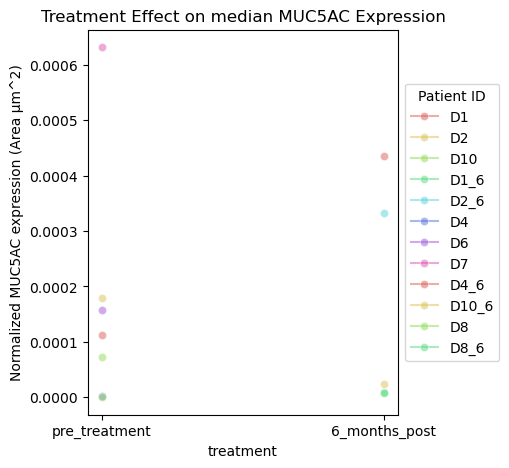

In [21]:
# Assuming df_final is your DataFrame and it contains columns 'Treatment', 'Patient_ID', and the value you want to plot
plt.figure(figsize=(4, 5))

# Create a line plot
sns.lineplot(data=df_final, 
             x='treatment', 
             y=f"Normalized {channel_name} expression (Area µm^2)", 
             hue='slide_ID', 
             marker='o', 
             palette= sample_id_colors)

# Add title and labels
plt.title(f'Treatment Effect on {measurement} {channel_name} Expression')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Patient ID')

/var/folders/yq/6fgvx0fj0cs57zmqydzbhbfh0000gn/T/ipykernel_52519/768098841.py:8: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.lineplot(data=df_final,


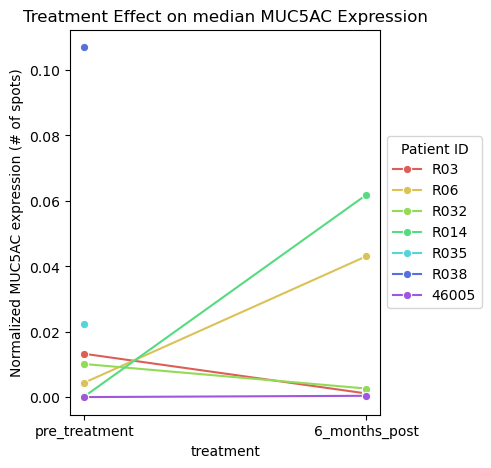

In [22]:
# Assuming df_final is your DataFrame and it contains columns 'Treatment', 'Patient_ID', and the value you want to plot
plt.figure(figsize=(4, 5))

# set colors
palette = {'pre_treatment': 'red', '6_months_post': 'blue'}

# Create a line plot
sns.lineplot(data=df_final, 
             x='treatment', 
             y=f"Normalized {channel_name} expression (# of spots)", 
             hue='patient_ID', 
             marker='o', 
             palette= sample_id_colors)

# Add title and labels
plt.title(f'Treatment Effect on {measurement} {channel_name} Expression')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Patient ID')